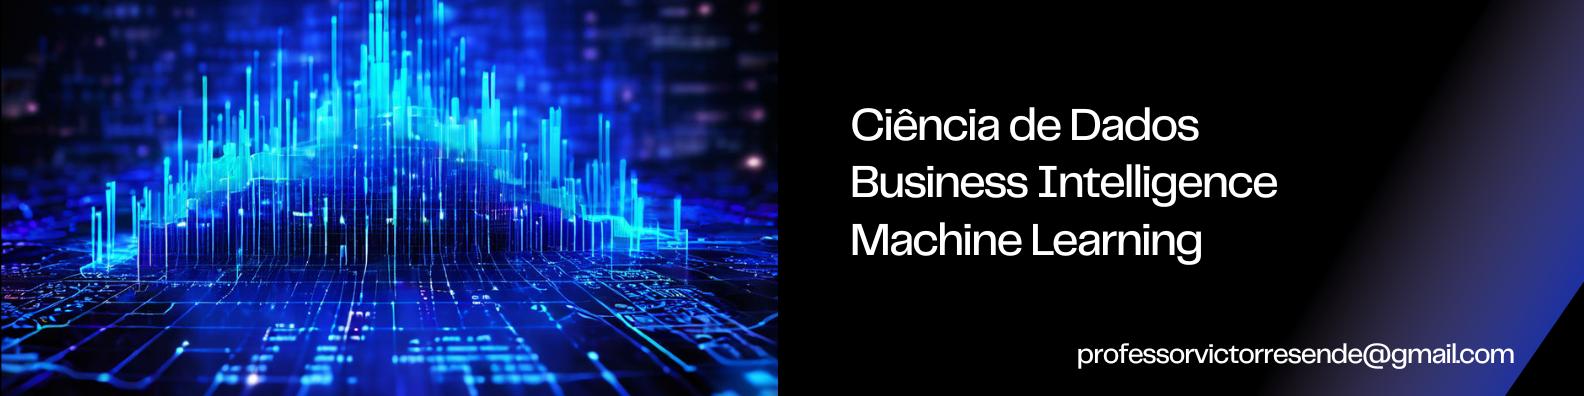

# **Projeto: Uso de Água Potável no Brasil e no Mundo**
### **Victor Resende**

_____________

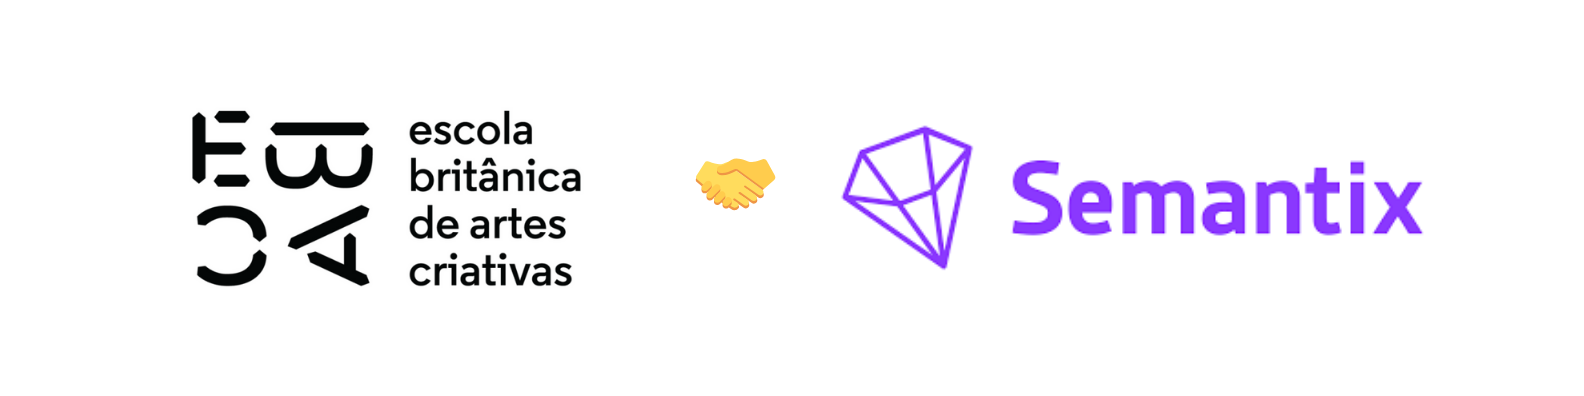

____________

# **Projeto de Parceria | Semantix**

Acreditando em transformar dados em cuidados, como propõe a [Semantix](https://semantix.ai/sobre-a-companhia/), esse projeto visa explorar e entender os dados globais sobre acesso à água, saneamento e higiene.

Os dados foram coletados por Willian Oliveira Gibin e estão disponíveis na plataforma Kaggle.

Diponível no Kaggle: [Água, Saneamento e Higiene](https://www.kaggle.com/datasets/willianoliveiragibin/water-sanitation-and-hygiene/code). 

Essa base possui os seguintes dados:

| Campo | Descrição | Tipo | 
|--------|-----------|------|
| Country | Países respectivos | String |
| Year | Ano de referência | Inteiro |
| Usage of safely managed drinking water services | Distribuição do uso de serviços de água potável segura, em percentuais | Float |


De acordo com as informações disponíveis na plataforma temos que as taxas de mortalidade por fontes de água inseguras destacam diferenças significativas entre países, com índices elevados em nações de baixa renda, especialmente na África Subsaariana e na Ásia, superando 50 mortes por 100.000 pessoas. Em contraste, países ricos, como na Europa, têm taxas abaixo de 0,1 mortes por 100.000. Há uma forte relação negativa entre renda e mortalidade: países mais ricos apresentam menores taxas.

A Meta 6.1 dos **Objetivos de Desenvolvimento Sustentável**  ([ODS](https://www.ipea.gov.br/ods/ods6.html)) visa alcançar acesso universal à água potável segura até 2030, mas o progresso é lento. Em 2015, 70% da população global tinha acesso a água potável segura, aumentando pouco desde então, tornando improvável atingir a meta no prazo. Em países de baixa renda, menos de um terço da população usa fontes seguras de água, concentrando-se na África Subsaariana.

Fontes de água melhoradas, como poços protegidos e água encanada, têm maior probabilidade de serem seguras, mas isso não é garantido, pois características como qualidade e segurança não são testadas no momento do uso.

Nesse caso, propomos aqui a discussão sobre como esses dados são relevantes para entendermos nossa realidade brasileira.

Esse projeto, então, se divide em 3 partes:

**1. Coleta e exploração dos dados:** aqui vamos explorar dados mundiais e do continente americano, com comparações destacando o Brasil. Os dados serão tratados e preparados para a próxima fase. 

**2. Modelagem e Análise dos Dados**: aplicaremos técnicas de modelagem de dados e analisaremos os dados mundiais e com destaque para a realidade brasileira. 

**3. Conclusões**: nesse último tópico procuramos extrair o quadro atual da situação brasileira, em termos de águas seguras para consumo, e quais desdobramentos podemos sugerir para futuros projetos que ajudem na criação e manutenção de um mundo mais sustentável, incluindo o Brasil.


_____________

## Carregando as Bibliotecas Necessárias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
import os


## 1. Coleta e Exploração dos Dados:

In [2]:
# Carregando o arquivo CSV:
arquivo = "share-of-the-population-using-safely-managed-drinking-water-sources.csv"
dados = pd.read_csv(arquivo)

# Exibindo as primeiras linhas do dataset:
print("Primeiras linhas do dataset:")
dados.head()


Primeiras linhas do dataset:


,Country,Year,Usage of safely managed drinking water services
0,Afghanistan,2000,11.093327
1,Afghanistan,2001,11.105221
2,Afghanistan,2002,12.007733
3,Afghanistan,2003,12.909922
4,Afghanistan,2004,13.818684


In [3]:
# Quantidade de linhas:
dados

,Country,Year,Usage of safely managed drinking water services
0,Afghanistan,2000,11.093327
1,Afghanistan,2001,11.105221
2,Afghanistan,2002,12.007733
3,Afghanistan,2003,12.909922
4,Afghanistan,2004,13.818684
...,...,...,...
5732,Zimbabwe,2018,26.807938
5733,Zimbabwe,2019,26.683977
5734,Zimbabwe,2020,26.573847
5735,Zimbabwe,2021,26.476995


In [4]:
# Listando os nomes das colunas:
print("Colunas disponíveis no dataset:")
print(dados.columns)


Colunas disponíveis no dataset:
Index(['Country', 'Year', 'Usage of safely managed drinking water services'], dtype='object')


In [5]:
# Informações gerais sobre o dataset:
print("\nInformações sobre o dataset:")
print(dados.info())

# Estatísticas descritivas das colunas numéricas:
print("\nEstatísticas descritivas:")
print(dados.describe())

# Verificando valores únicos em cada coluna:
print("\nValores únicos em cada coluna:")
for coluna in dados.columns:
    print(f"{coluna}: {dados[coluna].nunique()} valores únicos")


Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          5737 non-null   object 
 1   Year                                             5737 non-null   int64  
 2   Usage of safely managed drinking water services  3784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.6+ KB
None

Estatísticas descritivas:
              Year  Usage of safely managed drinking water services
count  5737.000000                                      3784.000000
mean   2010.972285                                        68.667447
std       6.586229                                        30.188662
min    2000.000000                                         1.430447
25%    2005.000000                    

__________

### Visualizando alguns dados para exploração:

#### 1. Histograma da distribuição do uso de serviços de água potável segura
Mostra a distribuição da variável numérica Usage of safely managed drinking water services.

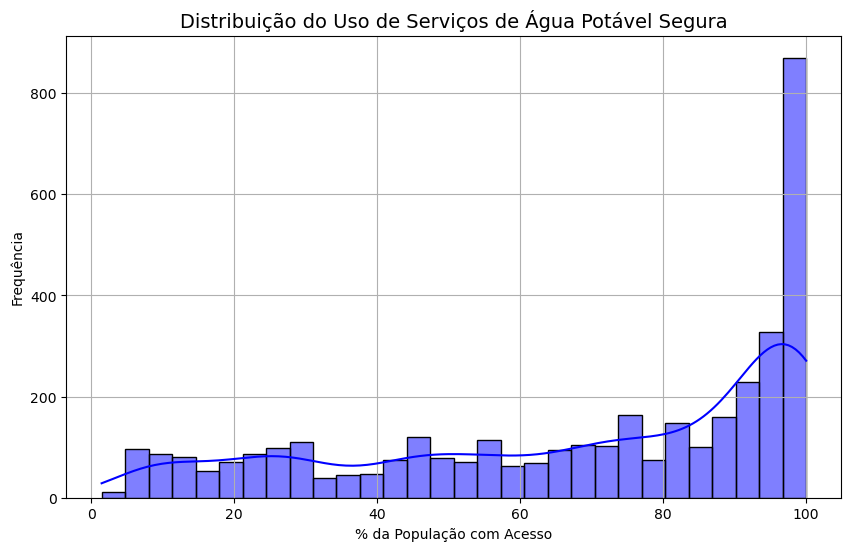

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['Usage of safely managed drinking water services'], bins=30, kde=True, color='blue')
plt.title('Distribuição do Uso de Serviços de Água Potável Segura', fontsize=14)
plt.xlabel('% da População com Acesso')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


#### 2. Boxplot do uso de serviços de água segura por ano
Visualiza como a distribuição da variável muda ao longo do tempo.

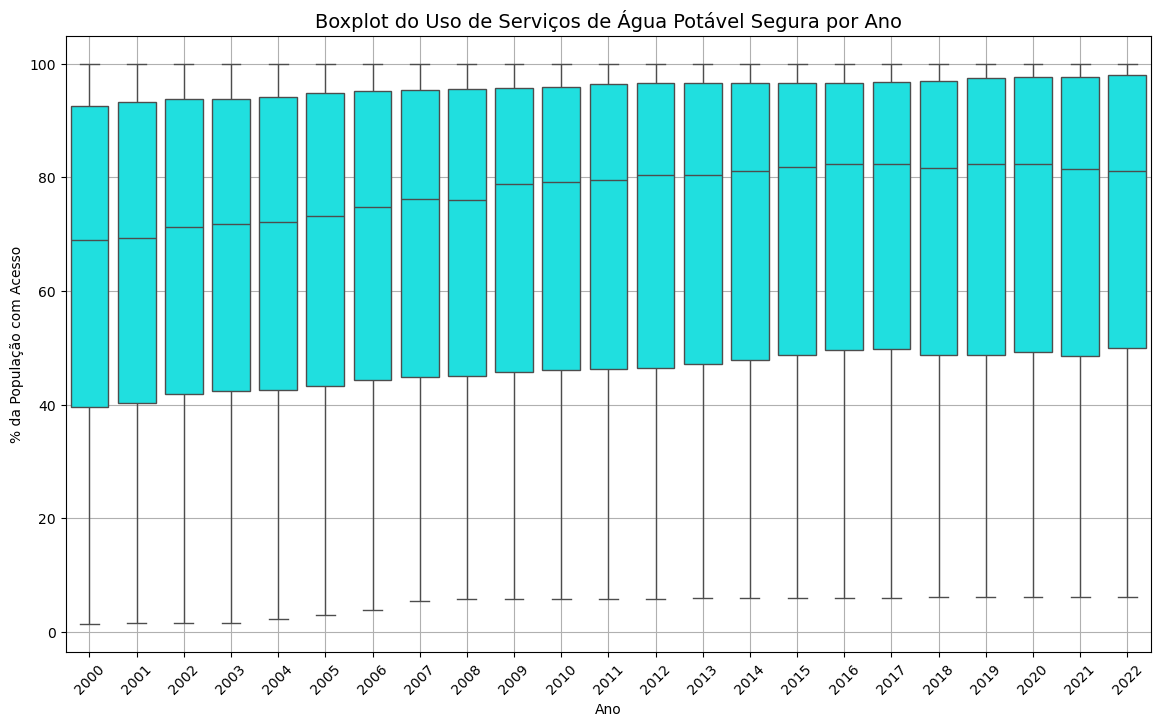

In [7]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dados, x='Year', y='Usage of safely managed drinking water services', color='cyan')
plt.title('Boxplot do Uso de Serviços de Água Potável Segura por Ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 3. Evolução média global do uso de serviços de água segura
Mostra a média anual global dessa métrica.

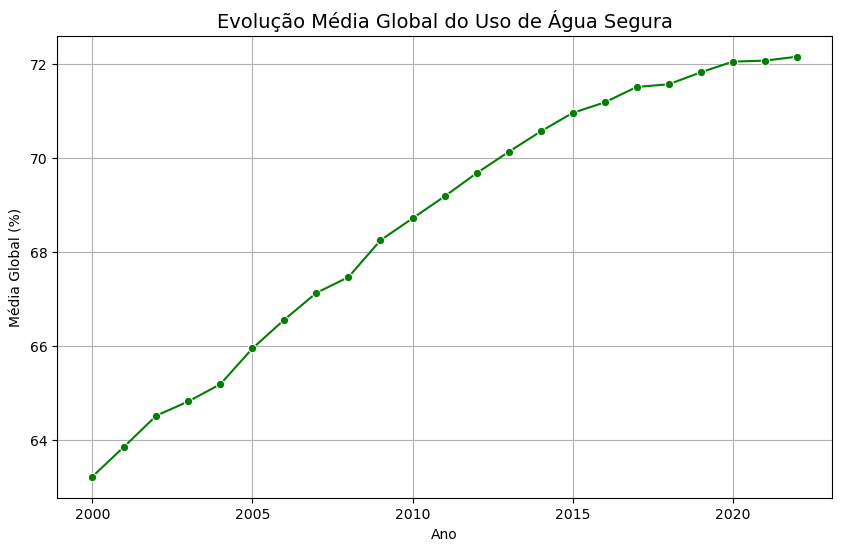

In [8]:
media_anual = dados.groupby('Year')['Usage of safely managed drinking water services'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=media_anual, x='Year', y='Usage of safely managed drinking water services', marker='o', color='green')
plt.title('Evolução Média Global do Uso de Água Segura', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Média Global (%)')
plt.grid(True)
plt.show()


#### 4. Gráfico de barras para países com maior e menor média no período
Identificando os países com as maiores e menores médias em uso de água potável segura durante o período.

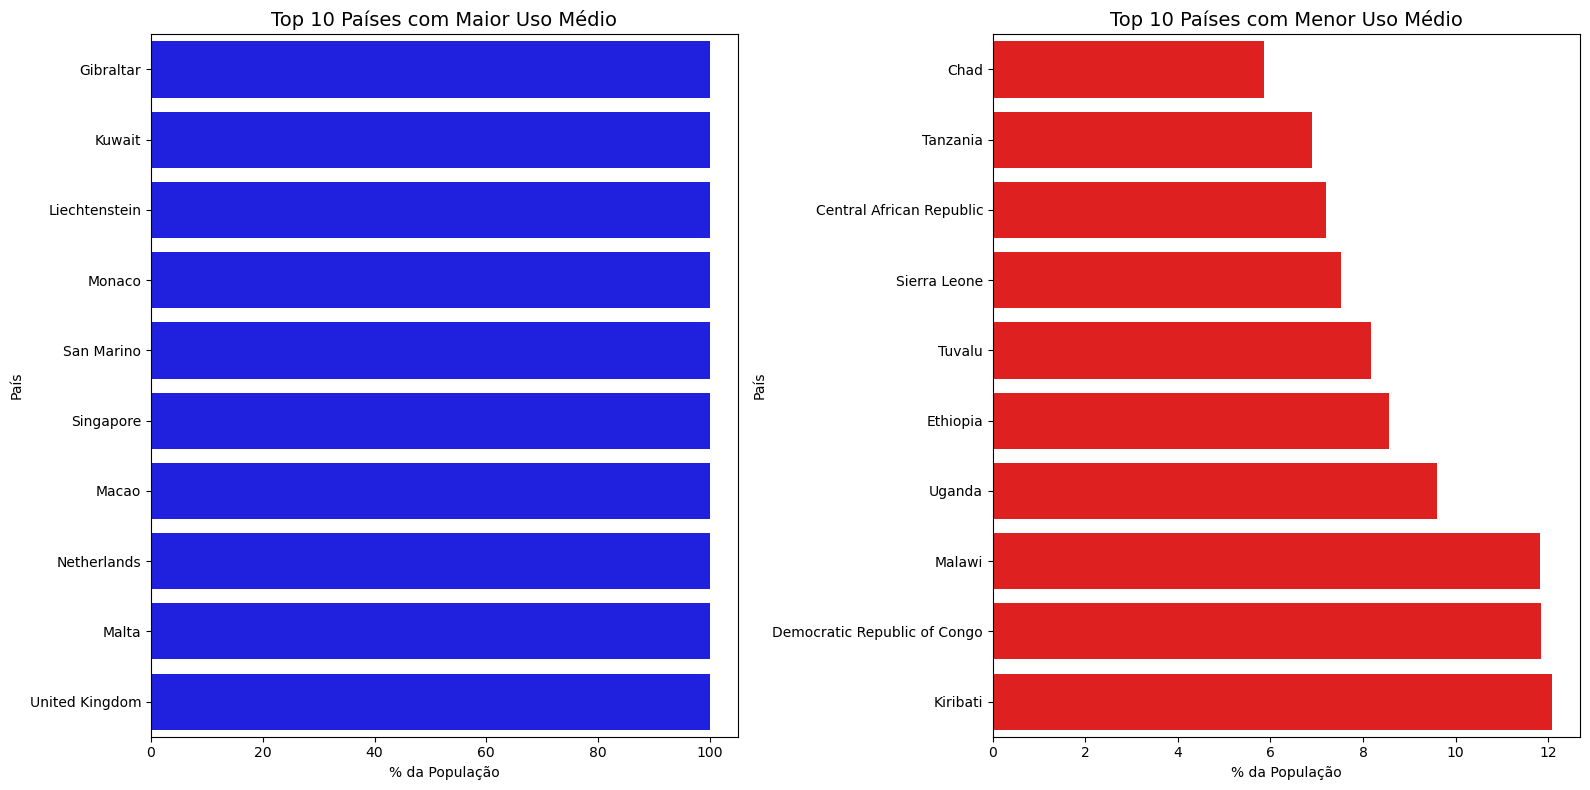

In [9]:
# Calculando as médias:
media_paises = dados.groupby('Country')['Usage of safely managed drinking water services'].mean().reset_index()
top_10_maiores = media_paises.nlargest(10, 'Usage of safely managed drinking water services')
top_10_menores = media_paises.nsmallest(10, 'Usage of safely managed drinking water services')

# Gráficos lado a lado:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.barplot(data=top_10_maiores, x='Usage of safely managed drinking water services', y='Country', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Países com Maior Uso Médio', fontsize=14)
axes[0].set_xlabel('% da População')
axes[0].set_ylabel('País')

sns.barplot(data=top_10_menores, x='Usage of safely managed drinking water services', y='Country', ax=axes[1], color='red')
axes[1].set_title('Top 10 Países com Menor Uso Médio', fontsize=14)
axes[1].set_xlabel('% da População')
axes[1].set_ylabel('País')

plt.tight_layout()
plt.show()


__________

### Tratando possíveis dados faltantes:

In [10]:
# Verificando valores ausentes no dataset:
missing_values = dados.isnull().sum()

# Criandondo um DataFrame apresentável com as informações de valores ausentes:
missing_df = pd.DataFrame({
    'Coluna': missing_values.index,
    'Valores Ausentes': missing_values.values,
    'Porcentagem (%)': (missing_values.values / len(dados)) * 100
}).sort_values(by='Valores Ausentes', ascending=False)

print(missing_df)


                                            Coluna  Valores Ausentes  \
2  Usage of safely managed drinking water services              1953   
0                                          Country                 0   
1                                             Year                 0   

   Porcentagem (%)  
2        34.042182  
0         0.000000  
1         0.000000  


- **Os dados mostram que a coluna “Utilização de serviços de água potável geridos com segurança” possui 1.953 valores ausentes , correspondendo a 34,04% do total. As outras colunas, "País" e "Ano", não possuem valores ausentes**.

In [11]:
# Preenchendo os valores ausentes com a mediana da coluna 'Usage of safely managed drinking water services' para cada país:
mediana_por_pais = dados.groupby('Country')['Usage of safely managed drinking water services'].transform('median')
dados['Usage of safely managed drinking water services'] = dados['Usage of safely managed drinking water services'].fillna(mediana_por_pais)

# Verificando se os valores ausentes foram preenchidos:
missing_values_after = dados.isnull().sum()

# Criando DataFrame com informações sobre valores ausentes após o preenchimento:
missing_df_after = pd.DataFrame({
    'Coluna': missing_values_after.index,
    'Valores Ausentes': missing_values_after.values,
    'Porcentagem (%)': (missing_values_after.values / len(dados)) * 100
}).sort_values(by='Valores Ausentes', ascending=False)

print(missing_df_after)


                                            Coluna  Valores Ausentes  \
2  Usage of safely managed drinking water services              1888   
0                                          Country                 0   
1                                             Year                 0   

   Porcentagem (%)  
2        32.909186  
0         0.000000  
1         0.000000  


In [12]:
# Carregando o arquivo CSV:
arquivo = "share-of-the-population-using-safely-managed-drinking-water-sources.csv"
dados = pd.read_csv(arquivo)

# Verificando a quantidade de valores ausentes por país:
valores_ausentes_por_pais = dados.groupby('Country')['Usage of safely managed drinking water services'].apply(lambda x: x.isnull().sum())

# Ordenando os países com mais valores ausentes:
valores_ausentes_por_pais = valores_ausentes_por_pais.sort_values(ascending=False)

# Exibindo os países com mais valores ausentes:
print(valores_ausentes_por_pais.head(10))


Country
Faroe Islands            23
Turkey                   23
Greenland                23
Seychelles               23
Gabon                    23
Solomon Islands          23
Somalia                  23
South Africa             23
Falkland Islands         23
South-east Asia (WHO)    23
Name: Usage of safely managed drinking water services, dtype: int64


- **Esse cenário pode ocorrer devido a registros incompletos ou falta de dados para essas localidades**.

_____________

#### Tratando os valores ausentes desses países com a mediana global da coluna "Uso de serviços de água potável geridos com segurança":

In [13]:
# Calculando a mediana global da coluna 'Usage of safely managed drinking water services':
mediana_global = dados['Usage of safely managed drinking water services'].median()

# Preenchendo os valores ausentes nos países com a mediana global:
dados['Usage of safely managed drinking water services'] = dados['Usage of safely managed drinking water services'].fillna(mediana_global)

# Verificando se os valores ausentes foram preenchidos:
missing_values_after_global = dados.isnull().sum()

# Criando DataFrame com informações sobre valores ausentes após o preenchimento com a mediana global:
missing_df_after_global = pd.DataFrame({
    'Coluna': missing_values_after_global.index,
    'Valores Ausentes': missing_values_after_global.values,
    'Porcentagem (%)': (missing_values_after_global.values / len(dados)) * 100
}).sort_values(by='Valores Ausentes', ascending=False)

# Exibindo a tabela de valores ausentes após o preenchimento:
print(missing_df_after_global)


                                            Coluna  Valores Ausentes  \
0                                          Country                 0   
1                                             Year                 0   
2  Usage of safely managed drinking water services                 0   

   Porcentagem (%)  
0              0.0  
1              0.0  
2              0.0  


____________

### Visualizando alguns dados para exploração para a América Latina e com destaque para o Brasil:

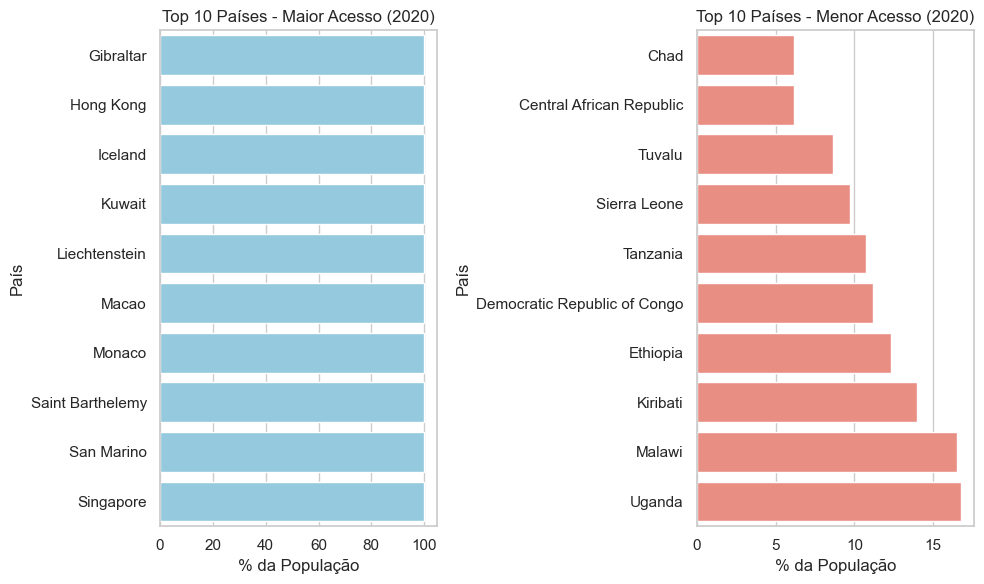

In [14]:
# Configuração geral para os gráficos:
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))

# 1. Top 10 países com maior e menor acesso à água segura:
coluna_agua_segura = 'Usage of safely managed drinking water services'
dados_top_2020 = dados[dados['Year'] == 2020]  # Filtrar o ano mais recente disponível
top_10_maior = dados_top_2020.nlargest(10, coluna_agua_segura)
top_10_menor = dados_top_2020.nsmallest(10, coluna_agua_segura)

# Gráfico para os 10 maiores e menores:
plt.subplot(1, 2, 1)
sns.barplot(data=top_10_maior, x=coluna_agua_segura, y='Country', orient='h', color='skyblue')
plt.title('Top 10 Países - Maior Acesso (2020)')
plt.xlabel('% da População')
plt.ylabel('País')

plt.subplot(1, 2, 2)
sns.barplot(data=top_10_menor, x=coluna_agua_segura, y='Country', orient='h', color='salmon')
plt.title('Top 10 Países - Menor Acesso (2020)')
plt.xlabel('% da População')
plt.ylabel('País')

plt.tight_layout()
plt.show()


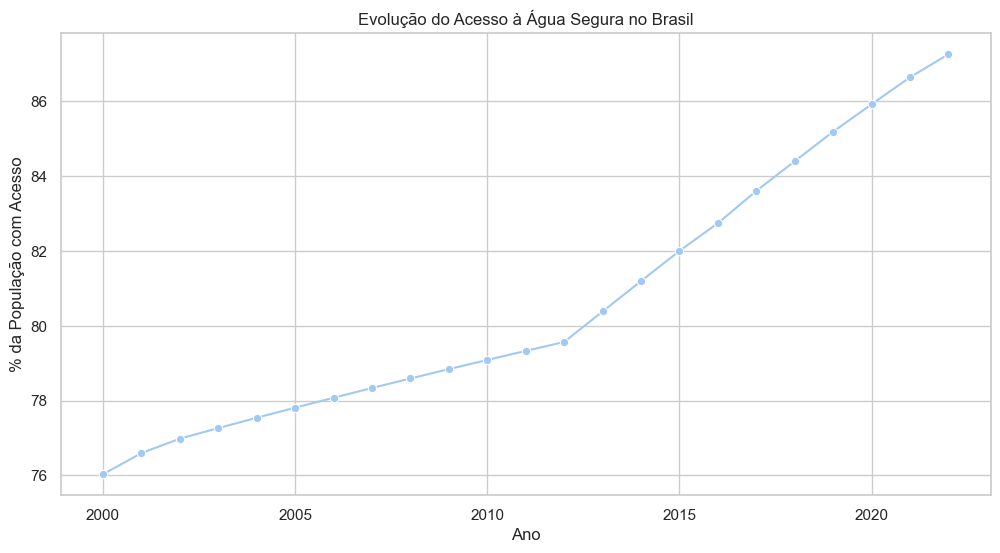

In [15]:
# 2. Evolução temporal para o Brasil:
dados_brasil = dados[dados['Country'] == 'Brazil']
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_brasil, x='Year', y=coluna_agua_segura, marker='o')
plt.title('Evolução do Acesso à Água Segura no Brasil')
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.grid(True)
plt.show()

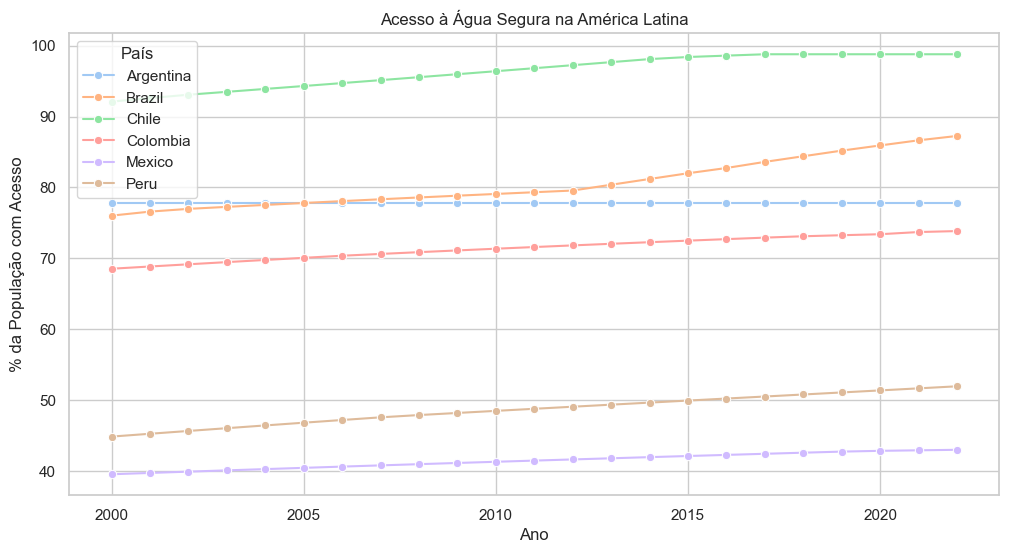

In [16]:
# 3. Comparação regional América Latina:
paises_latam = ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Mexico', 'Peru']
dados_latam = dados[dados['Country'].isin(paises_latam)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_latam, x='Year', y=coluna_agua_segura, hue='Country', marker='o')
plt.title('Acesso à Água Segura na América Latina')
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.legend(title='País', loc='best')
plt.grid(True)
plt.show()

____________

## 2. Modelagem e Análise dos Dados:

### 2.1. Pré-processamento de Dados e PCA

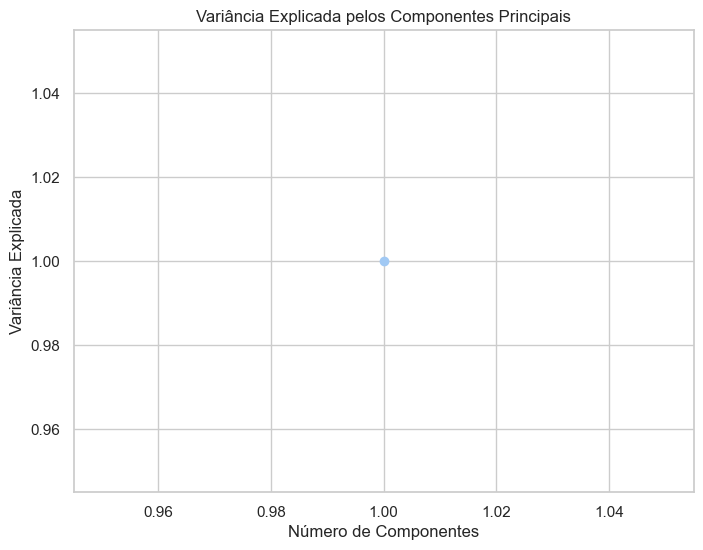

In [17]:
# Preenchendo valores ausentes com a mediana global (evitando o inplace=True):
dados['Usage of safely managed drinking water services'] = dados['Usage of safely managed drinking water services'].fillna(dados['Usage of safely managed drinking water services'].median())

# Normalizando os dados (importante para PCA)
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados[['Usage of safely managed drinking water services']])

# Aplicando PCA:
pca = PCA(n_components=1)
dados_pca = pca.fit_transform(dados_normalizados)

# Plotando a variância explicada por cada componente:
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Variância Explicada pelos Componentes Principais')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada')
plt.show()


### 2.2. Modelos de Classificação e Regressão

Aqui vamos usar uma combinação de modelos de regressão (exemplo: **Random Forest** e **Regressão Linear**) para prever o uso de água potável segura.

In [18]:
# Definindo as variáveis independentes e dependentes:
X = dados[['Year']]  # 'Year' como variável preditora
y = dados['Usage of safely managed drinking water services']

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_lr = LinearRegression()

# Treinamento dos modelos:
modelo_rf.fit(X_train, y_train)
modelo_lr.fit(X_train, y_train)

# Previsões:
pred_rf = modelo_rf.predict(X_test)
pred_lr = modelo_lr.predict(X_test)

# Combinação dos modelos (média das previsões):
pred_comb = (pred_rf + pred_lr) / 2

# Avaliação do desempenho:
mse_rf = mean_squared_error(y_test, pred_rf)
mse_lr = mean_squared_error(y_test, pred_lr)
mse_comb = mean_squared_error(y_test, pred_comb)

print(f'MSE Random Forest: {mse_rf}')
print(f'MSE Regressão Linear: {mse_lr}')
print(f'MSE Combinação de Modelos: {mse_comb}')


MSE Random Forest: 583.5769041696517
MSE Regressão Linear: 578.4908509176216
MSE Combinação de Modelos: 580.8634097828625


### 2.3. K-means (Agrupamento)

Vamos aplicar o algoritmo K-means para identificar grupos semelhantes.

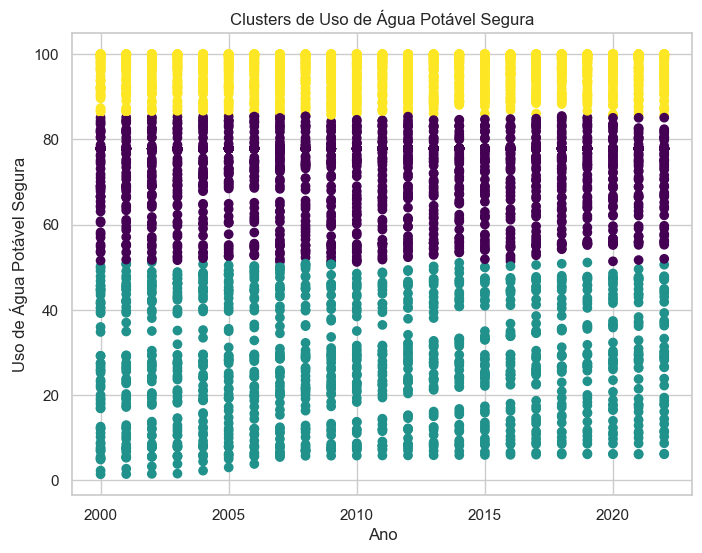

In [19]:
# Definindo o número de clusters:
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplicando K-means:
dados['Cluster'] = kmeans.fit_predict(dados[['Usage of safely managed drinking water services']])

# Visualizando os clusters:
plt.figure(figsize=(8,6))
plt.scatter(dados['Year'], dados['Usage of safely managed drinking water services'], c=dados['Cluster'], cmap='viridis')
plt.title('Clusters de Uso de Água Potável Segura')
plt.xlabel('Ano')
plt.ylabel('Uso de Água Potável Segura')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


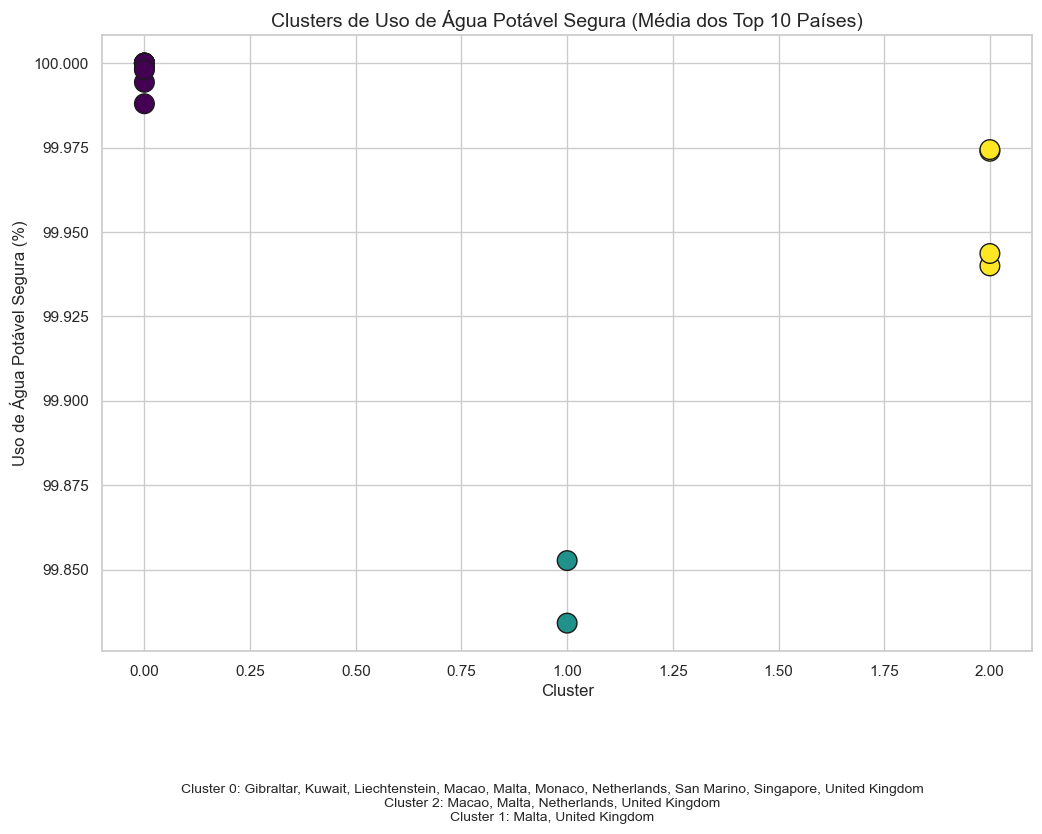

In [20]:
# Configurando variável de ambiente para evitar aviso do KMeans:
os.environ["OMP_NUM_THREADS"] = "1"

# Calculando a média por país
medias_paises = dados.groupby('Country')['Usage of safely managed drinking water services'].mean()

# Selecionando os 10 países com maior média:
top_10_paises = medias_paises.nlargest(10).index

# Filtrando os dados para os 10 países selecionados:
dados_top_10 = dados[dados['Country'].isin(top_10_paises)].copy()

# Aplicando K-means nos dados filtrados:
kmeans = KMeans(n_clusters=3, random_state=42)
dados_top_10.loc[:, 'Cluster'] = kmeans.fit_predict(
    dados_top_10[['Usage of safely managed drinking water services']]
)

# Criando um novo dataframe com as médias:
dados_media = (
    dados_top_10.groupby(['Country', 'Cluster'])['Usage of safely managed drinking water services']
    .mean()
    .reset_index()
)

# Visualizando os clusters com as médias:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    dados_media['Cluster'], 
    dados_media['Usage of safely managed drinking water services'], 
    c=dados_media['Cluster'], 
    cmap='viridis', 
    s=200,  # Tamanho dos pontos
    edgecolor='k'
)

# Configurações do gráfico:
plt.title('Clusters de Uso de Água Potável Segura (Média dos Top 10 Países)', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Uso de Água Potável Segura (%)')
plt.grid(True)

# Criando a legenda fora do gráfico:
clusters_legenda = {
    cluster: dados_media[dados_media['Cluster'] == cluster]['Country'].tolist()
    for cluster in dados_media['Cluster'].unique()
}

legenda_texto = "\n".join(
    [f"Cluster {cluster}: {', '.join(paises)}" for cluster, paises in clusters_legenda.items()]
)
plt.figtext(0.5, -0.1, legenda_texto, wrap=True, horizontalalignment='center', fontsize=10)

# Exibir o gráfico
plt.show()


### 2.4. Probabilidade e Inferência Estatística

Usando a **Regressão Logística** para prever a probabilidade de um país ter mais de <font color = 'red'> 80% da população <font color= 'black'>com acesso à <font color = 'blue'>água segura <font color= 'black'>.

In [21]:
# Criando uma variável binária:
dados['Acesso_Alta'] = (dados['Usage of safely managed drinking water services'] > 80).astype(int)

# Definindo variáveis independentes e dependentes:
X = dados[['Year']]
y = dados['Acesso_Alta']

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão logística:
modelo_log = LogisticRegression()
modelo_log.fit(X_train, y_train)

# Prevendo as probabilidades:
y_pred_prob = modelo_log.predict_proba(X_test)[:, 1]

# Avaliando o modelo:
accuracy = accuracy_score(y_test, modelo_log.predict(X_test))

print(f'Acurácia da Regressão Logística: {accuracy}')


Acurácia da Regressão Logística: 0.6567944250871081


### 2.5. Ajuste fino de hiperparâmetros com Grid Search

Aplicando a busca em grade (**Grid Search**) para melhorar o desempenho do modelo, como **Random Forest**, ajustando as configurações para melhorar os resultados. 

O Grid Search experimenta todas as opções possíveis de configurações para encontrar a melhor configuração.

In [22]:
# Definindo o modelo:
rf = RandomForestRegressor()

# Definindo os parâmetros para o Grid Search:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicando o Grid Search:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Resultados do melhor modelo:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Melhor score: -0.008261936101857992


### Ajustando o modelo:

In [23]:
# Definindo o modelo RandomForestClassifier:
rf_classifier = RandomForestClassifier(random_state=42)

# Definindo os parâmetros para o Grid Search:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Aplicando o Grid Search:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Resultados do melhor modelo:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor pontuação:", grid_search.best_score_)

# Avaliação da acurácia no conjunto de teste:
y_pred_rf = grid_search.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia do Random Forest Classifier: {accuracy_rf}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Melhor pontuação: 0.6855524907163884
Acurácia do Random Forest Classifier: 0.6567944250871081


- Mantivemos, aqui, a nossa acurácia.

____

## Verificando os dados no Brasil:

- Vejamos, agora, o cenário em nosso país.

In [24]:
# Filtrando os dados para o Brasil:
dados_brasil = dados[dados['Country'] == 'Brazil']

# Exibindo as primeiras linhas para garantir que os dados foram filtrados corretamente:
dados_brasil.head()


,Country,Year,Usage of safely managed drinking water services,Cluster,Acesso_Alta
701,Brazil,2000,76.03210,0,0
702,Brazil,2001,76.59753,0,0
703,Brazil,2002,76.98464,0,0
704,Brazil,2003,77.26597,0,0
705,Brazil,2004,77.54171,0,0


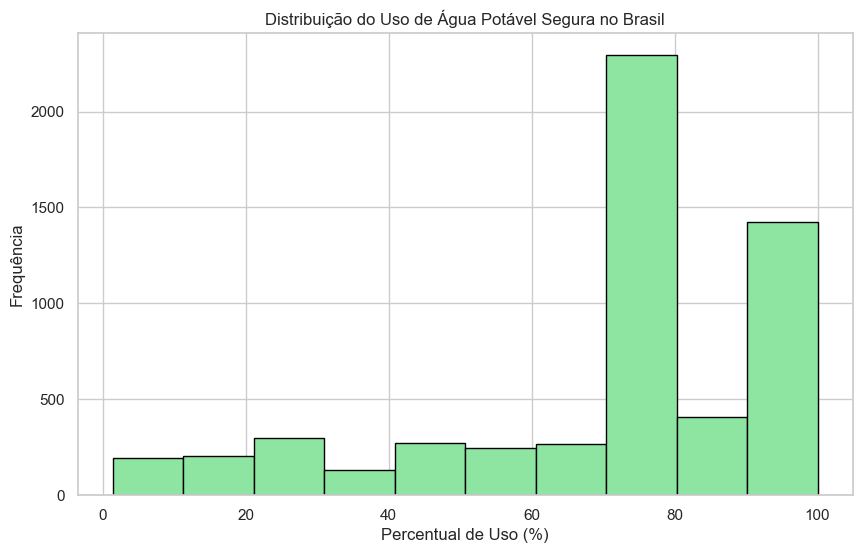

In [25]:
# Histograma para a distribuição do uso de água potável segura:
plt.figure(figsize=(10, 6))
plt.hist(dados['Usage of safely managed drinking water services'], bins=10, color='g', edgecolor='black')
plt.title('Distribuição do Uso de Água Potável Segura no Brasil')
plt.xlabel('Percentual de Uso (%)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


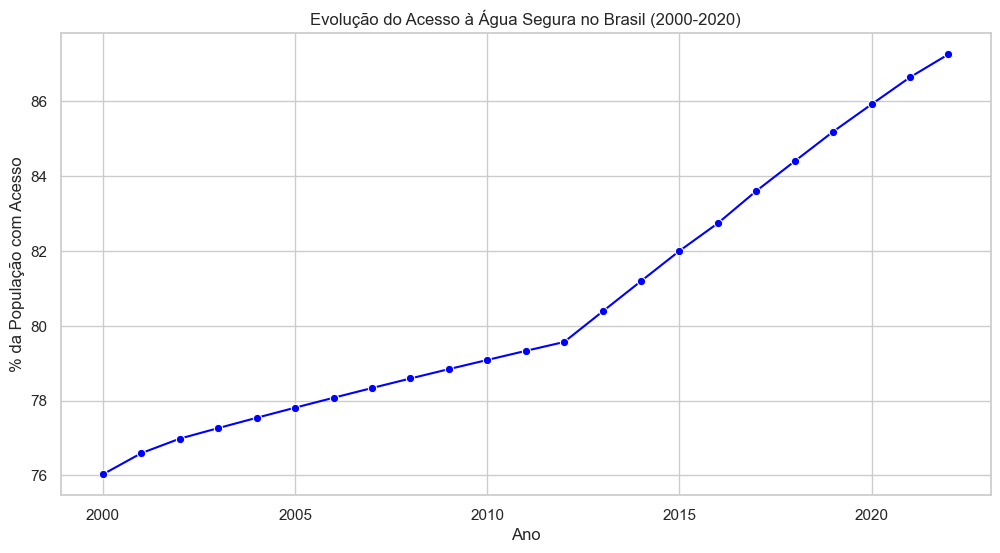

In [26]:
# Filtrando os dados para o Brasil:
dados_brasil = dados[dados['Country'] == 'Brazil']

# Gráfico de linha para mostrar a evolução do acesso à água segura no Brasil:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_brasil, x='Year', y='Usage of safely managed drinking water services', marker='o', color='blue')
plt.title('Evolução do Acesso à Água Segura no Brasil (2000-2020)')
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.grid(True)
plt.show()


In [27]:
# Calculando a taxa de crescimento anual para o Brasil:
dados_brasil['Growth'] = dados_brasil['Usage of safely managed drinking water services'].pct_change() * 100
growth_brasil = dados_brasil[['Year', 'Growth']].dropna()
print(growth_brasil)


     Year    Growth
702  2001  0.743673
703  2002  0.505382
704  2003  0.365437
705  2004  0.356871
706  2005  0.348530
707  2006  0.340770
708  2007  0.333182
709  2008  0.325752
710  2009  0.317791
711  2010  0.310709
712  2011  0.306896
713  2012  0.299969
714  2013  1.024559
715  2014  1.009815
716  2015  0.994724
717  2016  0.903383
718  2017  1.041651
719  2018  0.950760
720  2019  0.937068
721  2020  0.857709
722  2021  0.840788
723  2022  0.709426


C:\Users\User\AppData\Local\Temp\ipykernel_15772\2672471084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_brasil['Growth'] = dados_brasil['Usage of safely managed drinking water services'].pct_change() * 100


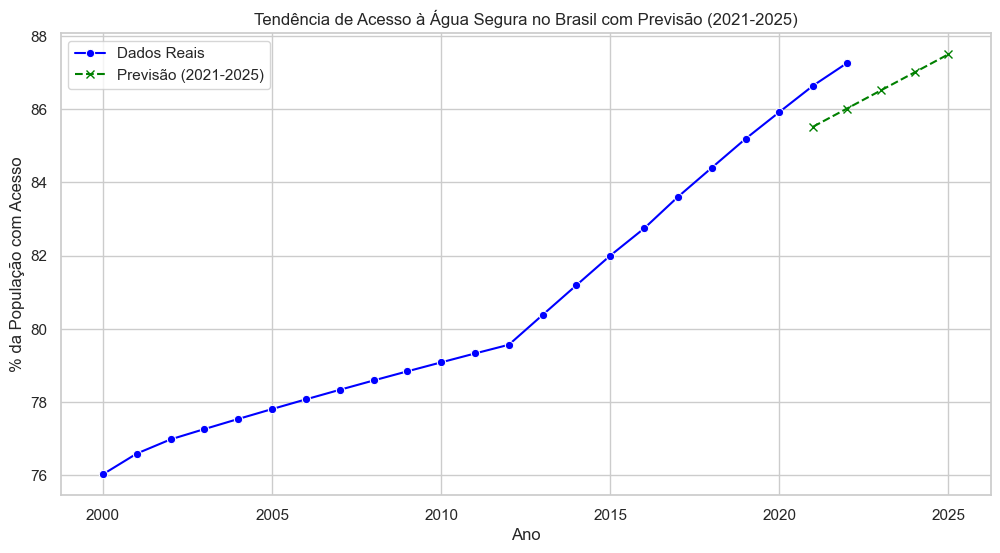

In [28]:
# Preparando os dados para o modelo de regressão (usando o ano como variável independente):
X_brasil = dados_brasil['Year'].values.reshape(-1, 1)
y_brasil = dados_brasil['Usage of safely managed drinking water services'].values

# Ajustando o modelo de regressão linear:
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_brasil, y_brasil)

# Prevendo para os próximos anos (2021 a 2025):
anos_futuros = np.array([2021, 2022, 2023, 2024, 2025]).reshape(-1, 1)
previsoes_brasil = modelo_regressao.predict(anos_futuros)

# Gráfico com a tendência de previsão:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_brasil, x='Year', y='Usage of safely managed drinking water services', marker='o', color='blue', label='Dados Reais')
plt.plot(anos_futuros, previsoes_brasil, marker='x', color='green', linestyle='--', label='Previsão (2021-2025)')
plt.title('Tendência de Acesso à Água Segura no Brasil com Previsão (2021-2025)')
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.legend()
plt.grid(True)
plt.show()


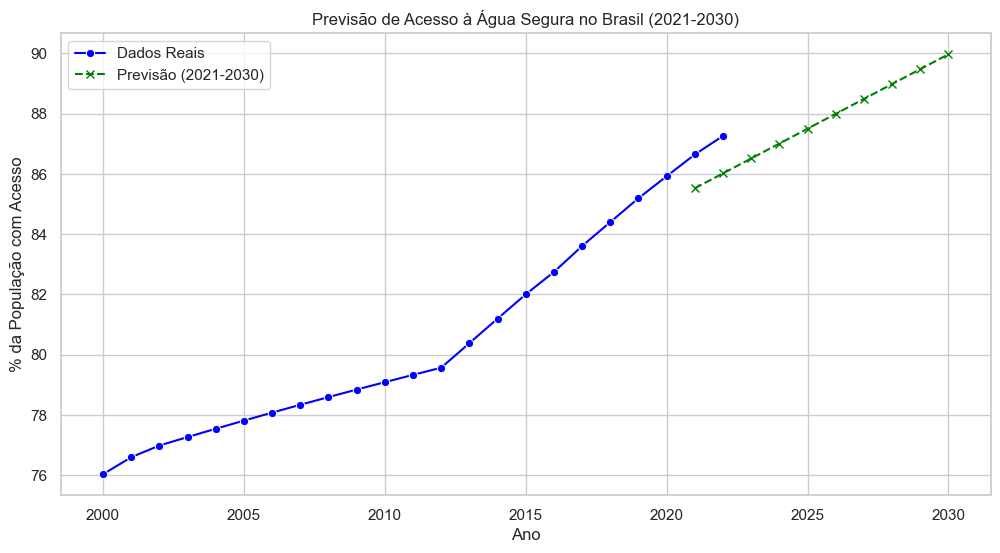

In [29]:
# Usando os dados já preparados para o Brasil
X_brasil = dados_brasil['Year'].values.reshape(-1, 1)
y_brasil = dados_brasil['Usage of safely managed drinking water services'].values

# Ajustando o modelo de regressão linear
modelo_regressao = LinearRegression()
modelo_regressao.fit(X_brasil, y_brasil)

# Prevendo para os próximos anos (2021 a 2030)
anos_futuros = np.array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
previsoes_brasil = modelo_regressao.predict(anos_futuros)

# Gráfico com a tendência de previsão
plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_brasil, x='Year', y='Usage of safely managed drinking water services', marker='o', color='blue', label='Dados Reais')
plt.plot(anos_futuros, previsoes_brasil, marker='x', color='green', linestyle='--', label='Previsão (2021-2030)')
plt.title('Previsão de Acesso à Água Segura no Brasil (2021-2030)')
plt.xlabel('Ano')
plt.ylabel('% da População com Acesso')
plt.legend()
plt.grid(True)
plt.show()


____

## 3. Conclusões:

- Verificamos que o cenário para o acesso à água segura e potável no Brasil tende a aumentar, trazendo um cenário mais otimista para o abastecimento de água no país.
- Se compararmos com os países da América Latina, o Brasil avança em termos de acesso à água segura no continente.
- Se temos um cenário que parece otimista para o aumento de acesso à água segura em nosso país, contudo, para que tal cenário se concretize e se perpetue, é necessária a adoção de políticas públicas.
- Se analisarmos, por exemplo, nosso gráfico de Distribuição de Uso de Água Potável, verificamos disparidades nesse acesso. Podemos pensar, então, em como as regiões em nosso país tem mais ou menos acesso à água potável e como tal problema pode ser solucionado.
- O que nos axulia na discusssão sobre o nível de desigualdade no acesso à água potável segura no Brasil.
- Sendo assim, as políticas públicas brasileiras podem se pautar em:

**1. Ampliação da Infraestrutura de Abastecimento de Água**<br>
Investimentos em sistemas de abastecimento: Construção e modernização de sistemas de captação, tratamento e distribuição de água potável, especialmente em áreas rurais, comunidades isoladas e periferias urbanas.<br>
Prioridade para regiões menos assistidas: Destino de recursos públicos com base em um mapeamento atualizado das áreas com menor cobertura de acesso à água potável.

**2. Universalização do Saneamento Básico**<br>
Meta de curto e médio prazo : Expansão da coleta e tratamento de esgoto como parte de um plano nacional, integrando saneamento e acesso à água.<br>
Parcerias público-privadas (PPPs): Incentivar parcerias que possibilitem maior alcance das metas de universalização, garantindo a regulação e fiscalização pela esfera pública.

**3. Educação e Sensibilização**<br>
Campanhas de conscientização: Promoção de campanhas públicas sobre a importância do consumo consciente da água e a preservação dos recursos hídricos.<br>
Educação ambiental nas escolas: Inserção de conteúdos sobre gestão e uso sustentável da água nos currículos escolares, especialmente nas regiões mais impactadas pela escassez.

**4. Incentivo à Gestão Sustentável da Água**<br>
Programas de uso eficiente: Incentivo às práticas de reutilização de água, coleta de água de chuva e tecnologias de economia de água em domicílios e indústrias.<br>
Proteção das nascentes e rios: Implantação de programas de revitalização de bacias hidrográficas e áreas de preservação ambiental que garantam a qualidade e quantidade de água.

**5. Redução das Desigualdades Regionais**<br>
Subsídios para comunidades vulneráveis: Implementação de tarifas sociais de água e subsídios para famílias de baixa renda, priorizando regiões com maior índice de desigualdade sem acesso.<br>
Monitoramento regionalizado: Criação de um sistema nacional de indicadores de acesso à água segura, com dados desagregados por região, município e nível socioeconômico.

**6. Fortalecimento da Governança e Regulação**<br>
Planejamento integrado: Estabelecer mecanismos de coordenação entre União, estados e municípios para a gestão integrada dos recursos hídricos.<br>
Agências reguladoras atuantes: Fortalecer o papel das agências reguladoras na fiscalização da qualidade da água e cumprimento das metas de universalização.

**7. Financiamento e Incentivos Fiscais**<br>
Fundos públicos e internacionais : Criação ou ampliação de fundos destinados à melhoria da infraestrutura hídrica, com possibilidade de parcerias com organizações internacionais.<br>
Isenções fiscais: Concessão de incentivos fiscais para empresas e cidadãos que adotem práticas de preservação e uso sustentável da água.

**Destacamos que essas políticas devem ser acompanhadas de monitoramento contínuo e ajustes periódicos, garantindo que os avanços no acesso à água potável sejam sustentáveis ​​e equitativos em todo o território brasileiro.**

_________